# processing data

In [22]:
from pandas import read_csv
from json import load, dump

df = read_csv('C:/Users/danie/OneDrive/Desktop/GAME Sequencing/taxonomy.tsv', sep='\t').set_index('Feature ID')
df 

,Taxon,Confidence
Feature ID,,
a5ad9574a1f8aea06b6dfaff6eddfff7,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.876989
a27f37aae2a34101f8a61c6f0b1cd246,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.812380
6589433bc08b7cdc5ea1e4928683ed00,k__Bacteria; p__Actinobacteriota; c__Actinobac...,0.978255
38b371de3be6ddef03bea94294e9830d,k__Archaea; p__Euryarchaeota; c__Methanobacter...,0.872175
1b976cc787b3465ddcc891c15c968a9b,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999524
...,...,...
31c50a4d3207815f673d3edebf772af3,k__Bacteria; p__Planctomycetota; c__Planctomyc...,0.986020
36090a0d50aa4bbbffdd4b9953b0c500,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.767113
a35cb9ab8e98072e9a43f7285279bcde,k__Bacteria; p__Firmicutes; c__Dethiobacteria;...,0.999985


In [23]:
df.to_json('taxonomy.json')

js=load(open('taxonomy.json','r'))
js.keys()

dict_keys(['Taxon', 'Confidence'])

In [24]:
definitions = {'k': 'Kingdom', 'p': 'Phylum', 'c': 'Class', 'o': 'Order', 'f': 'Family', 'g': 'Genus', 's': 'Species'}


print(js['Taxon']['a5ad9574a1f8aea06b6dfaff6eddfff7'])
for asv in js['Taxon']:
    dic = {}
    print(asv)
    for p in js['Taxon'][asv].split('; '): 
        content = p.split('__')
        # print(content)
        content[0] = definitions[content[0]] 
        # print('\n')
        # print(dict(content))
        dic[content[0]] = content[1]
    js['Taxon'][asv] = dic

print(js['Taxon']['a5ad9574a1f8aea06b6dfaff6eddfff7'])

k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Halomonadaceae; g__Halomonas; s__midas_s_110869
a5ad9574a1f8aea06b6dfaff6eddfff7
a27f37aae2a34101f8a61c6f0b1cd246
6589433bc08b7cdc5ea1e4928683ed00
38b371de3be6ddef03bea94294e9830d
1b976cc787b3465ddcc891c15c968a9b
3dd54183eecfa8bb215520814056e4b0
1240eb67c8c5004296a23b80d1a10296
016c815a4508d59f5cd00df84f95fa5d
a353b92733af5260a57dd1a0ba3001e1
9ab23c4d99ca81eaa9c30826e3201dd4
e95282c3197d4315d84f31d177642c58
076b820e5b709e62b933f76ab6c45254
3ade0fa13e56aac194bb3373200d6def
b96715d4c2e39e415550cf66da8a67f5
3487ee381e9bba57861b67ac3936d665
08ea1c9b9d368cd6d9bfeb8857e90315
fd95b1c4fe440dbd2ad6a10e70f8ae45
308aa3982d3c398eaae8efce7b0803f2
cd05a4b1cda569ae366c6980823f4c72
07246a1fc2c2fed9e54374f5ee46c333
8c86a02bd0f2c7a90bb40b735577a623
e561c5c5f92aa66e6b1befb81385d1fc
ae72db992b92b97750fc6662153b5369
64fc10f0a6641c24f1fc81c23d55d3b7
cd1f95189b8375347f827f4a8b08dcf7
b65ddb808f41ed58f0a87829f790124c
07e00e1bcc9d9a3

In [45]:
dump(js, open('new_taxonomy.json', 'w'), indent=3)
js

{'Taxon': {'a5ad9574a1f8aea06b6dfaff6eddfff7': 'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Halomonadaceae; g__Halomonas; s__midas_s_110869',
  'a27f37aae2a34101f8a61c6f0b1cd246': 'k__Bacteria; p__Firmicutes; c__Clostridia; o__Peptostreptococcales-Tissierellales; f__Serpentinicella; g__midas_g_75908',
  '6589433bc08b7cdc5ea1e4928683ed00': 'k__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Corynebacteriales; f__Corynebacteriaceae; g__Corynebacterium; s__midas_s_5929',
  '38b371de3be6ddef03bea94294e9830d': 'k__Archaea; p__Euryarchaeota; c__Methanobacteria; o__Methanobacteriales; f__Methanobacteriaceae; g__Methanobacterium; s__Methanobacterium_beijingense',
  '1b976cc787b3465ddcc891c15c968a9b': 'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Pseudomonadaceae; g__Thiopseudomonas',
  '3dd54183eecfa8bb215520814056e4b0': 'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Pseudomonadaceae; g__

In [53]:
ab = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/ASV_abundance_wideform.csv").set_index("seq")
ab

,1AB,2AB,3AB,4AB,5AB,6AB,7AB
seq,,,,,,,
63f37ee4b481fccdffca10160ed5b944,1.305925,0.000000,0.157978,0.000000,0.0,0.000000,0.291133
ed12d6c2cccee9737fcf027c28dc1504,0.024184,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
a353b92733af5260a57dd1a0ba3001e1,9.014510,0.000000,2.148499,0.000000,0.0,0.000000,2.054567
38b371de3be6ddef03bea94294e9830d,13.494559,0.000000,3.775671,0.028239,0.0,2.449694,12.069539
28f9a25539c92bd0c608d3c9cec7991b,0.912938,0.000000,0.363349,0.000000,0.0,0.000000,0.956580
...,...,...,...,...,...,...,...
58110345812f524d9a669d08b86d638e,0.000000,0.039785,0.000000,0.000000,0.0,0.000000,0.000000
e27e3671c48f3fc26fc25bfb66487cbc,0.000000,0.019893,0.000000,0.000000,0.0,0.000000,0.000000
a77c9d2b8200bef0d694237279a593f8,0.000000,0.049731,0.000000,0.000000,0.0,0.000000,0.000000


In [55]:
ab.to_json('abundance.json')

ab_js=load(open('abundance.json','r'))
ab_js.keys()

ab_js

{'1AB': {'63f37ee4b481fccdffca10160ed5b944': 1.30592503,
  'ed12d6c2cccee9737fcf027c28dc1504': 0.024183797,
  'a353b92733af5260a57dd1a0ba3001e1': 9.014510278,
  '38b371de3be6ddef03bea94294e9830d': 13.49455865,
  '28f9a25539c92bd0c608d3c9cec7991b': 0.912938331,
  '7281c911136ba2bdcafebb9c71729dea': 0.0,
  'c39f594d9d2493b66260c1f7503e5ea1': 0.399032648,
  'c4112b995ef6cd2f05559f6a3057bc7c': 0.0,
  'c54740e67850b527400a77af33bd3d89': 0.0,
  'fa8e5e27d8fba25e37fc05340a105914': 0.0,
  '326834f69c357dad79f31e792597dd1d': 0.0,
  '89056b9f86a0886730db47a8c45825eb': 0.0,
  '7d61548814c2806bca7f46e5de082b7e': 0.030229746,
  'e472b9258609f8985c34fb3e8706f692': 0.0,
  '532ff193b68d71a9e2229dd125e1eeb1': 0.0,
  '702860fda44c0d44ddacb5bd79fd5d24': 0.15114873,
  '4c301bbaaa0d8e3dc3356271c20fc5b5': 0.0,
  '8dba5d94c21557246f8c48418b0f3bda': 0.0,
  '73a1573f73ae093cf73af7ee45962885': 0.0,
  '35796c6b949f569e7a6af67f9e7cea60': 0.0,
  'bde5589b9ad383774dab7d2e122e1a20': 0.0,
  '82f3d62aabc8caf816ec2120e

In [62]:
md = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/GAME_Metadata.csv").set_index("sample")
md

,date,days
sample,,
1AB,9.11.23,45.0
2AB,7.73.23,1.0
3AB,10.2.22,66.0
4AB,8.24.23,25.0
5AB,10.15.23,79.0
6AB,10.15.23,81.0
7AB,5.10.24,NaN


In [64]:
md.T.to_json('metadata.json')

md_js=load(open('metadata.json','r'))
md_js.keys()

md_js

{'1AB': {'date': '9.11.23', 'days': 45.0},
 '2AB': {'date': '7.73.23', 'days': 1.0},
 '3AB': {'date': '10.2.22', 'days': 66.0},
 '4AB': {'date': '8.24.23', 'days': 25.0},
 '5AB': {'date': '10.15.23', 'days': 79.0},
 '6AB': {'date': '10.15.23', 'days': 81.0},
 '7AB': {'date': '5.10.24', 'days': None}}

# visualizing data

1AB


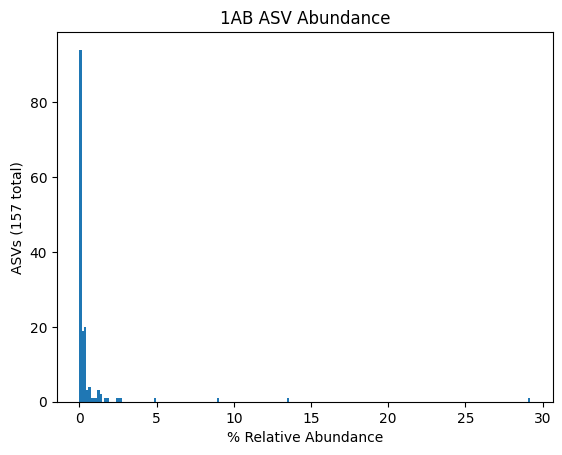

2AB


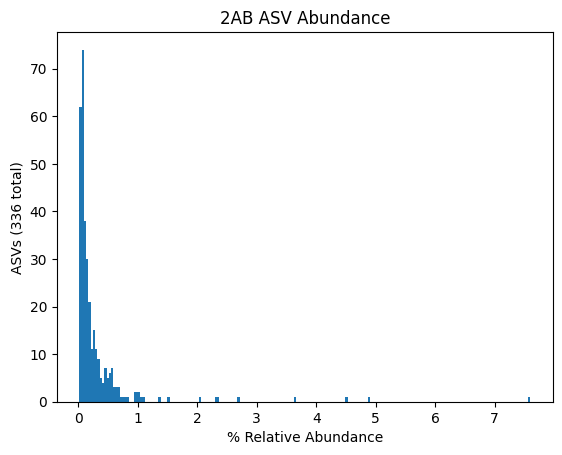

3AB


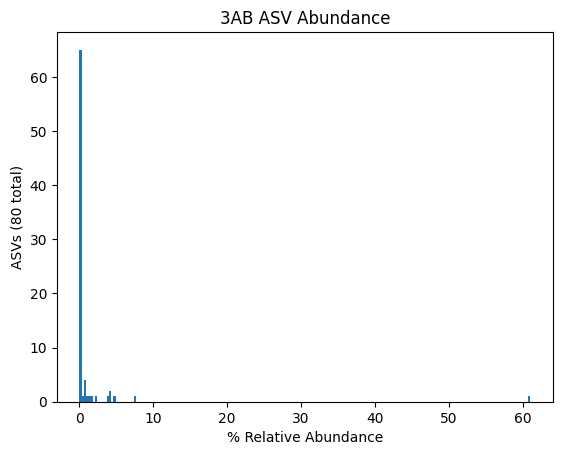

4AB


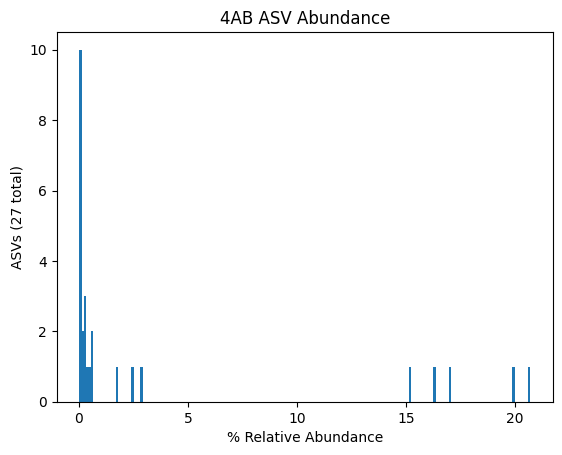

5AB


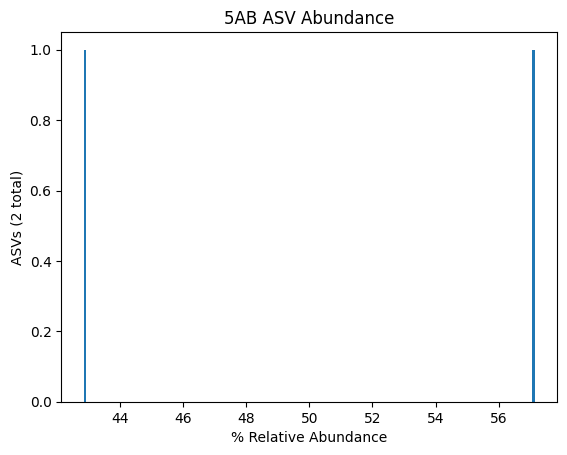

6AB


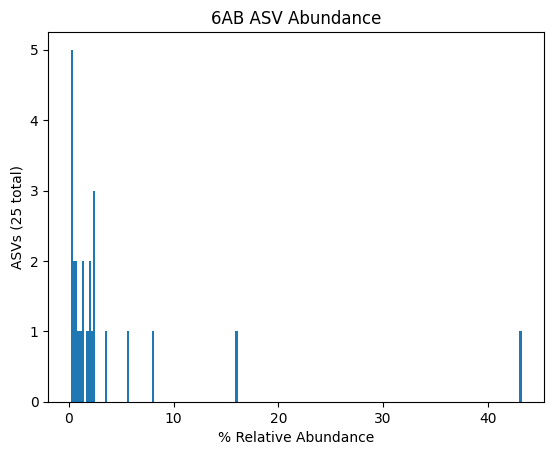

7AB


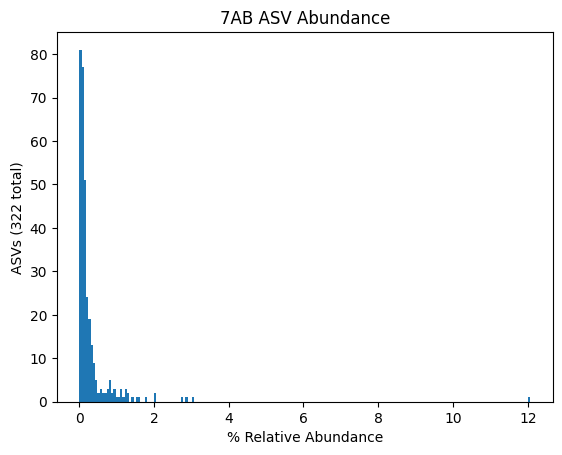

In [72]:
from matplotlib import pyplot as plt

from numpy import array 
for sample, content in ab_js.items() : 
    print(sample)
    abundances = array([x for x in list(content.values()) if x > 0])
    # print(len(abundances))

    plt.hist(abundances, bins=200)

    # Add labels and title
    plt.xlabel('% Relative Abundance')
    plt.ylabel(f'ASVs ({len(abundances)} total)')
    plt.title(f'{sample} ASV Abundance')

    # Display the plot
    plt.show()
    #    for asv, abundance in content.items() : 
#       print(asv)
